In [3]:
# Importing all of the requesite services and choosing our plot style
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
# Reading the file and assigning it to the variable "data"
file_path = "games.csv"
data = pd.read_csv(file_path)

In [5]:
#Create a map of the available ratings and assign them a value 1-9
rating_mapping = {
    'Overwhelmingly Negative': 1,
    'Very Negative': 2,
    'Negative': 3,
    'Mostly Negative': 4,
    'Mixed': 5,
    'Mostly Positive': 6,
    'Positive': 7,
    'Very Positive': 8,
    'Overwhelmingly Positive': 9
}

# Create a new column in data that is the mapping created above
data['numeric_rating'] = data['rating'].map(rating_mapping)

# Convert date syntax to Pandas datetime format
data['date_release'] = pd.to_datetime(data['date_release'])
# Using Pythons .dt Date/Time function to take the year from our input of YYYY-MM-DD
data['year'] = data['date_release'].dt.year

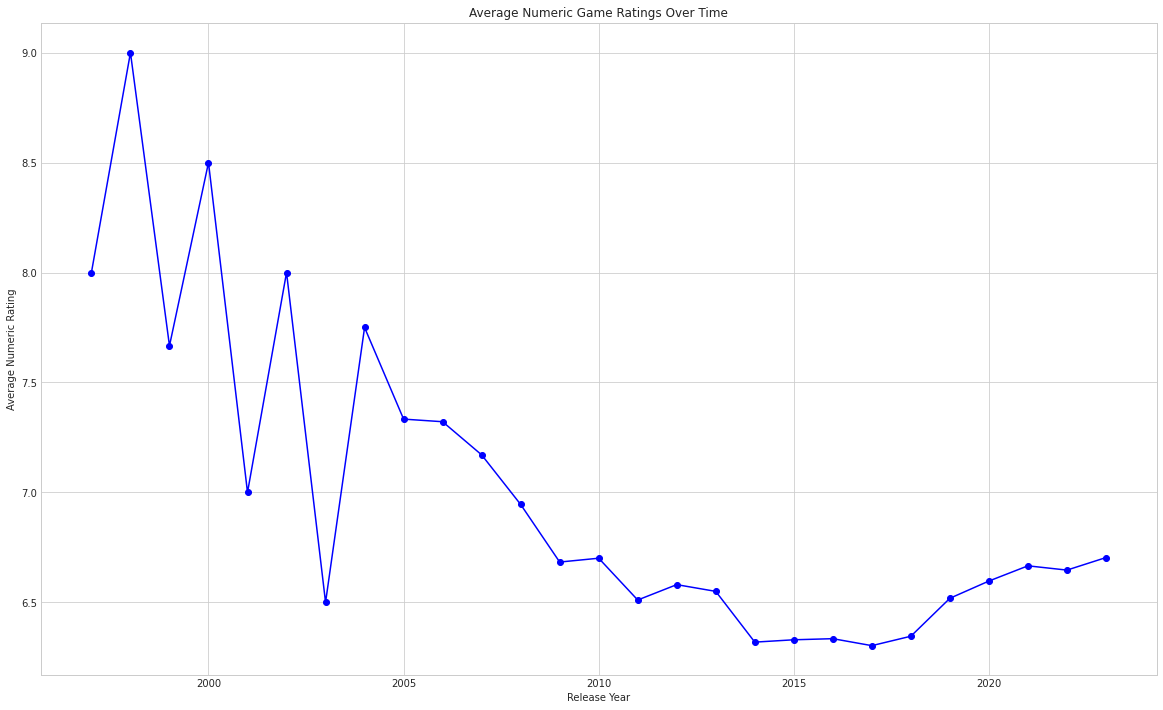

In [5]:
# Group the data by year and take the mean of our mapped rating
aggregated_data = data.groupby('year')['numeric_rating'].mean().reset_index()

# Plotting the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(aggregated_data['year'], aggregated_data['numeric_rating'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Numeric Rating')
plt.title('Average Numeric Game Ratings Over Time')

# Show the plot
plt.show()

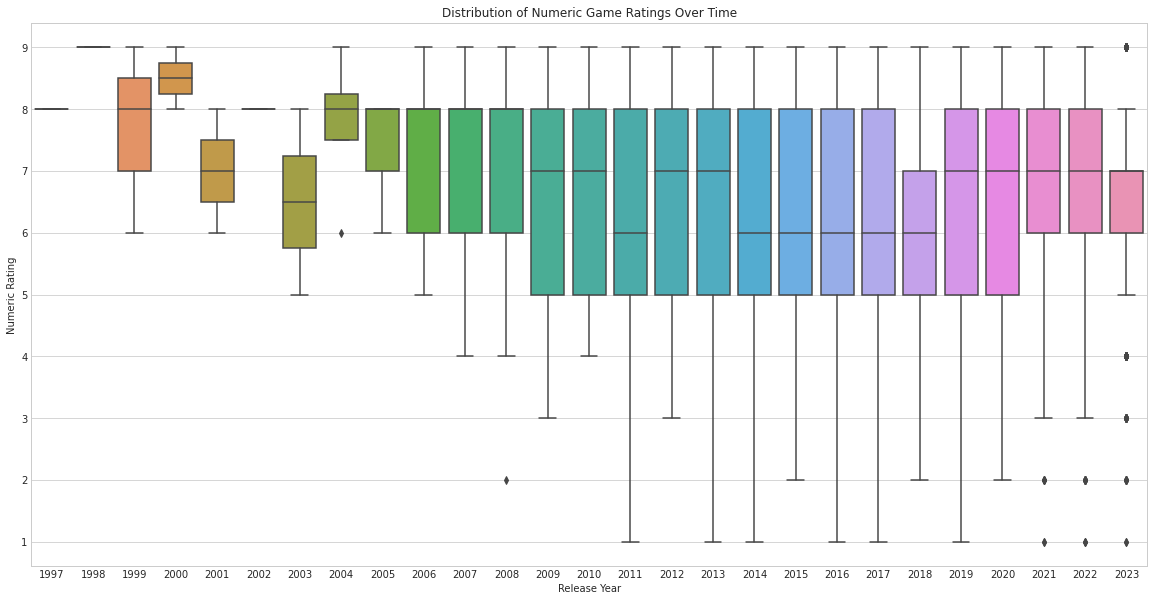

In [5]:
# Manually setting size
plt.figure(figsize=(20, 10))
sns.boxplot(x='year', y='numeric_rating', data=data)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Numeric Rating')
plt.title('Distribution of Numeric Game Ratings Over Time')

# Show the plot
plt.show()

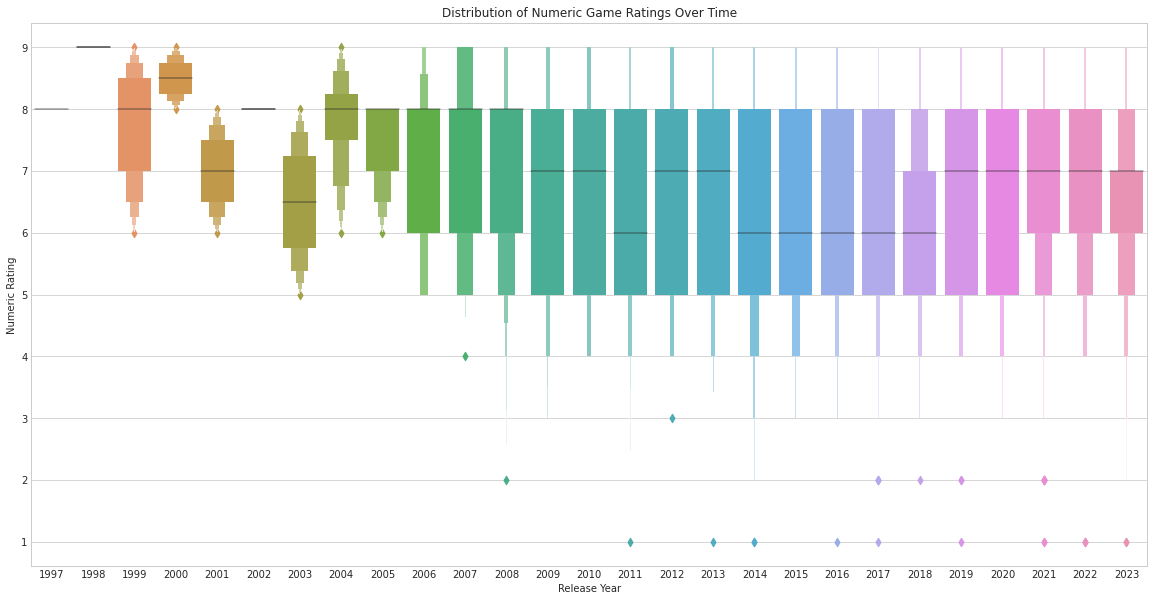

In [6]:
# Manually setting size and choosing data
plt.figure(figsize=(20, 10))
sns.boxenplot(x='year', y='numeric_rating', data=data)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Numeric Rating')
plt.title('Distribution of Numeric Game Ratings Over Time')

# Show the plot
plt.show()

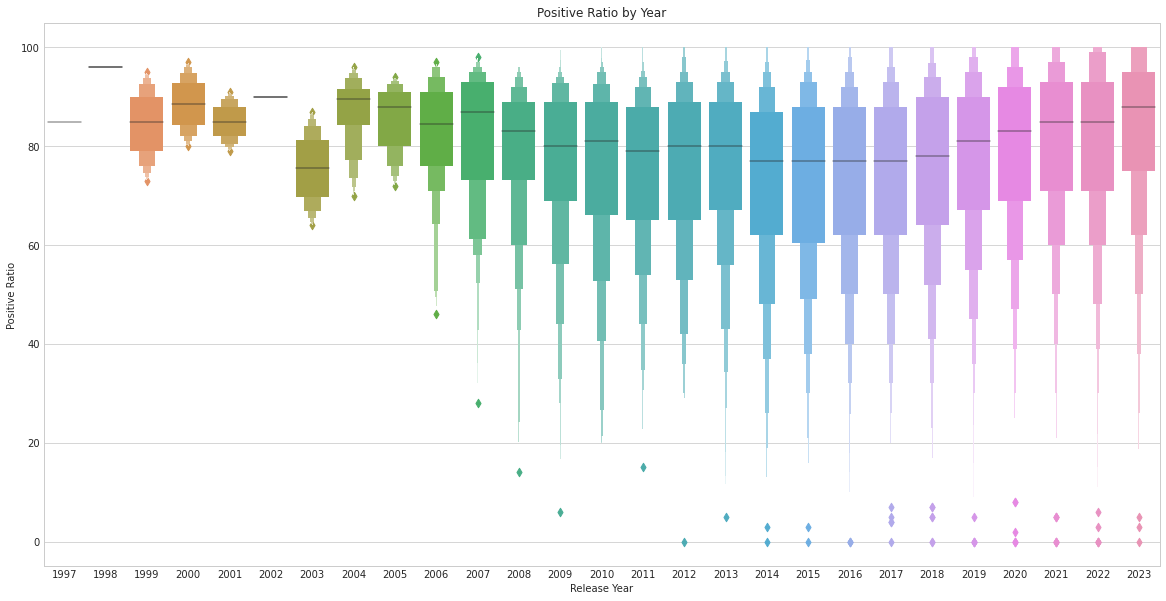

In [7]:
# Manually setting size and choosing data
plt.figure(figsize=(20, 10))
sns.boxenplot(x='year', y='positive_ratio', data=data)

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio by Year')

# Show the plot
plt.show()

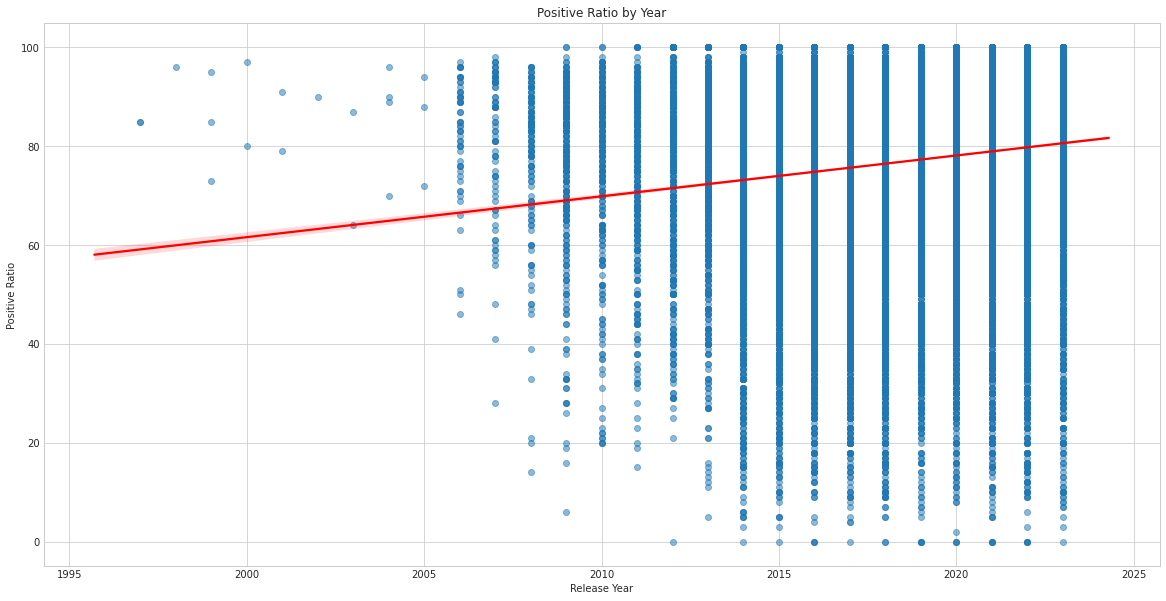

In [8]:
# Manually setting size and choosing data
plt.figure(figsize=(20,10))

# Stole this exact graph from my previous project and just plugged in the new column names
sns.regplot(x='year', y='positive_ratio', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio by Year')

# Show the plot
plt.show()

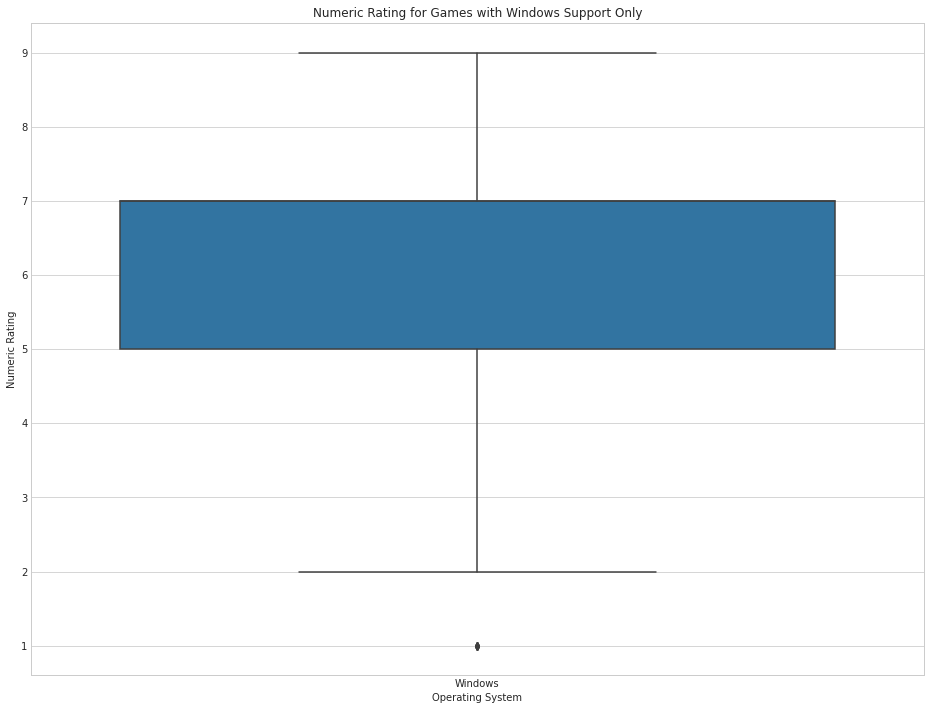

In [10]:
# Setting up 3 variables where only certain OS's are available
windows_only_data = data[(data['win'] == True) & (data['mac'] == False) & (data['linux'] == False)]
mac_only_data = data[(data['mac'] == True) & (data['linux'] == False) & (data['win'] == False)]
linux_only_data = data[(data['linux'] == True) & (data['mac'] == False) & (data['win'] == False)]

# Calculate the average rating for these games
#average_rating_windows_only = windows_only_data['numeric_rating'].mean()
average_rating_windows_only = windows_only_data['numeric_rating']
average_rating_mac_only = mac_only_data['numeric_rating']
average_rating_linux_only = linux_only_data['numeric_rating']

# Plotting a bar plot
plt.figure(figsize=(16, 12))
sns.boxplot(x=['Windows'], y=[average_rating_windows_only])

# Adding labels and title
plt.xlabel('Operating System')
plt.ylabel('Numeric Rating')
plt.title('Numeric Rating for Games with Windows Support Only')

# Show the plot
plt.show()

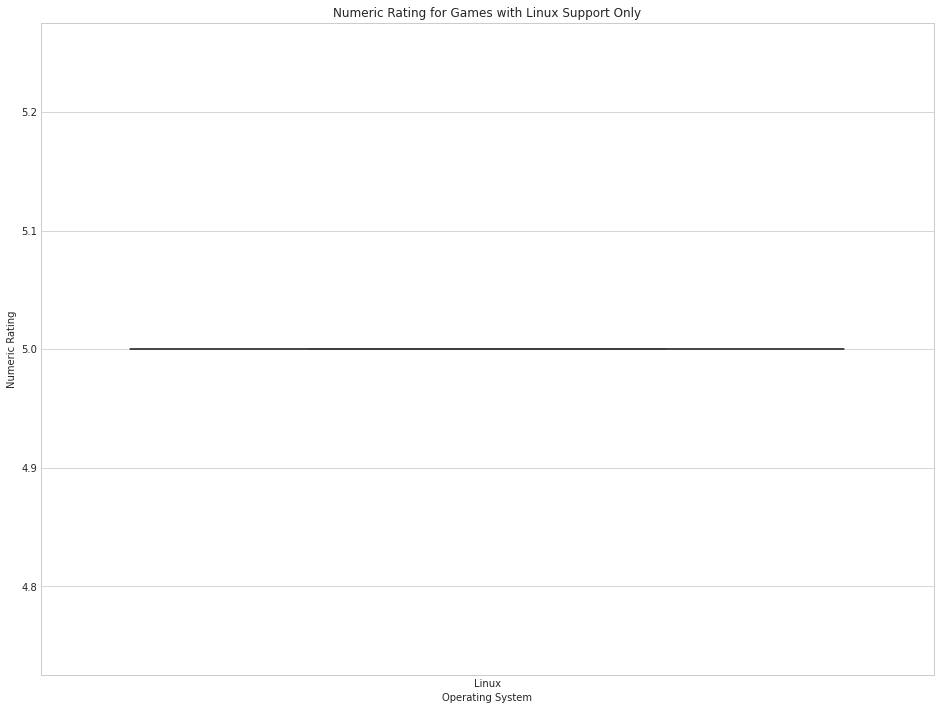

In [11]:
# Manually setting size and choosing data
plt.figure(figsize=(16, 12))
sns.boxplot(x=['Linux'], y=[average_rating_linux_only])

# Adding labels and title
plt.xlabel('Operating System')
plt.ylabel('Numeric Rating')
plt.title('Numeric Rating for Games with Linux Support Only')

# Show the plot
plt.show()

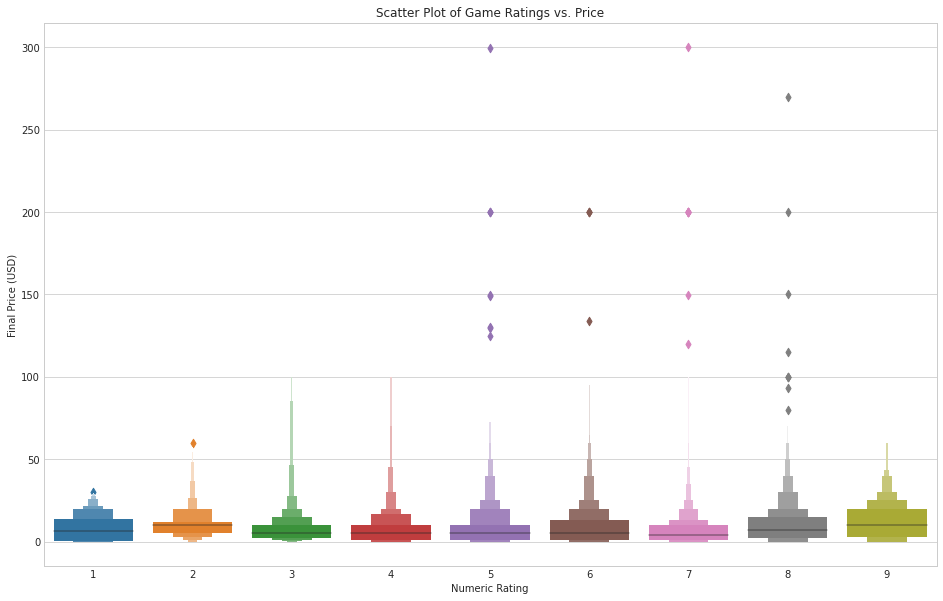

In [6]:
# Manually setting size and choosing data
plt.figure(figsize=(16, 10))
sns.boxenplot(x='numeric_rating', y='price_final', data=data)

# Adding labels and title
plt.ylabel('Final Price (USD)')
plt.xlabel('Numeric Rating')
plt.title('Scatter Plot of Game Ratings vs. Price')

# Show the plot
plt.show()

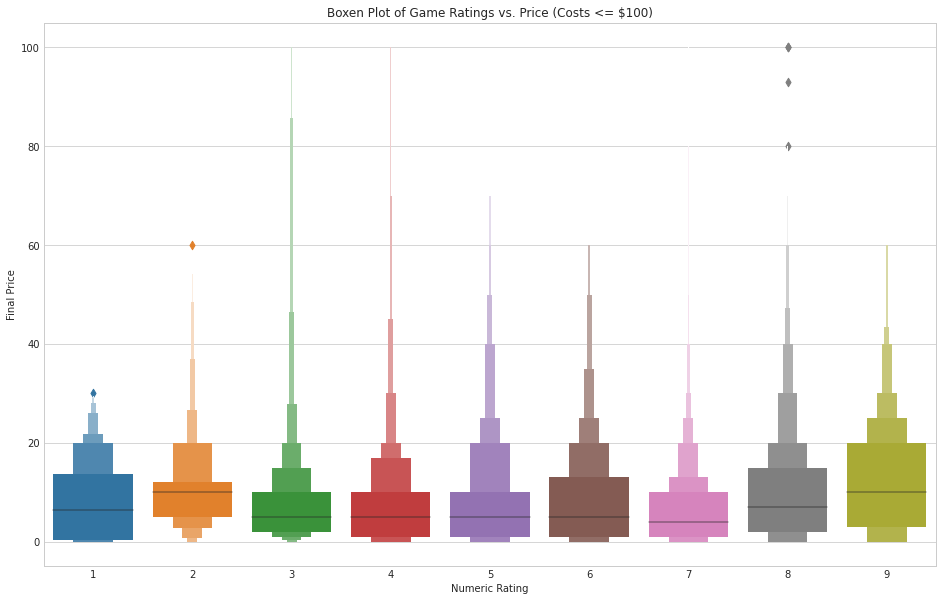

In [12]:
filtered_data = data[data['price_final'] <= 100]

# Plotting a scatter plot with regression line for the filtered data
plt.figure(figsize=(16, 10))
sns.boxenplot(x='numeric_rating', y='price_final', data=filtered_data)

# Adding labels and title
plt.ylabel('Final Price')
plt.xlabel('Numeric Rating')
plt.title('Boxen Plot of Game Ratings vs. Price (Costs <= $100)')

# Show the plot
plt.show()

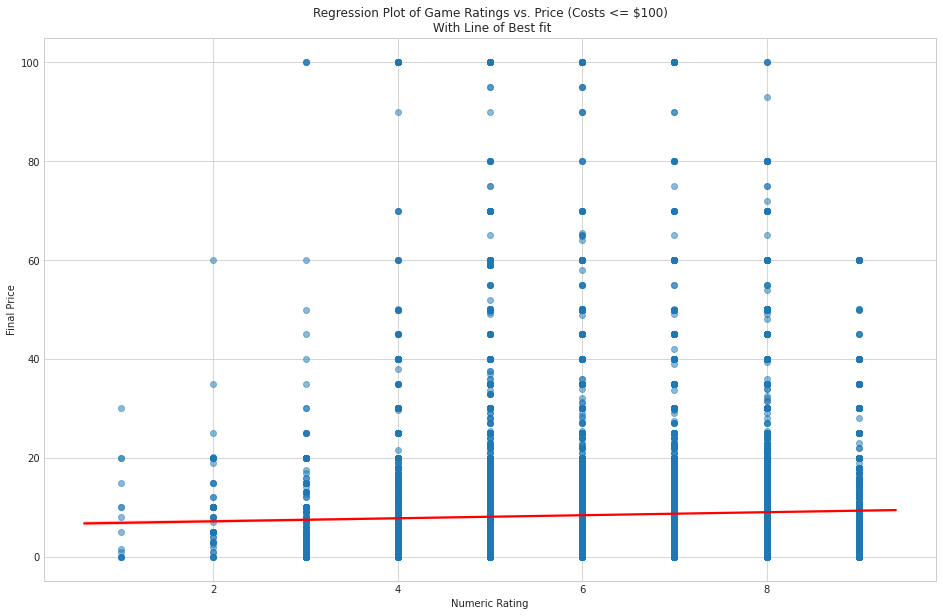

In [11]:
plt.figure(figsize=(16, 10))
sns.regplot(x='numeric_rating', y='price_final', data=filtered_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.ylabel('Final Price')
plt.xlabel('Numeric Rating')
plt.title('Regression Plot of Game Ratings vs. Price (Costs <= $100)\n With Line of Best fit')

# Show the plot
plt.show()

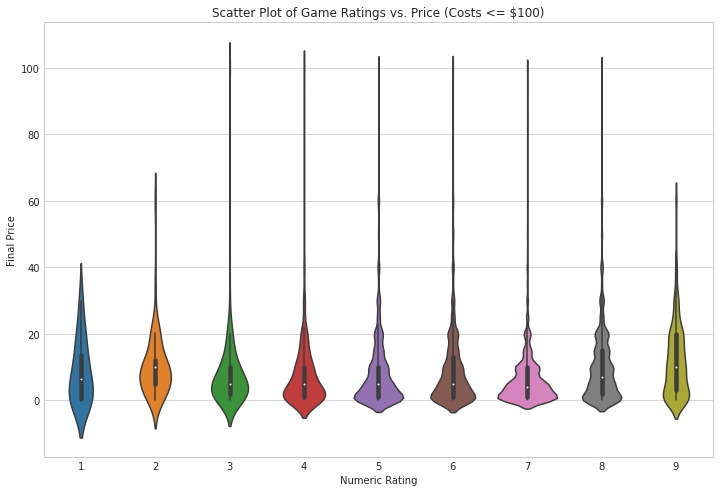

In [14]:
filtered_data = data[data['price_final'] <= 100]

# Plotting a scatter plot with regression line for the filtered data
plt.figure(figsize=(12, 8))
sns.violinplot(x='numeric_rating', y='price_final', data=filtered_data)

# Adding labels and title
plt.ylabel('Final Price')
plt.xlabel('Numeric Rating')
plt.title('Scatter Plot of Game Ratings vs. Price (Costs <= $100)')

# Show the plot
plt.show()

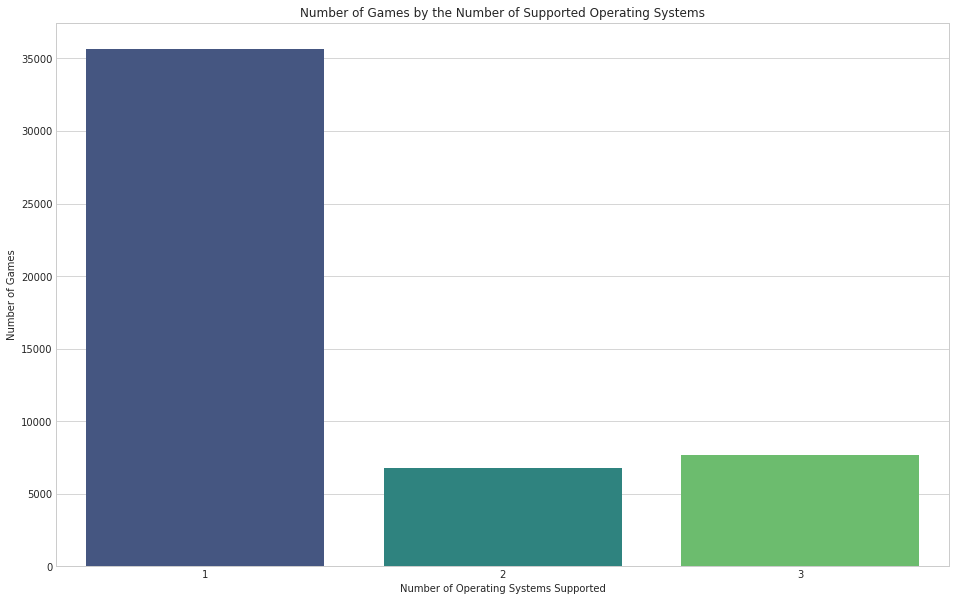

In [15]:
#Make a new column in data, choose from the OS's and count
data['os_count'] = data[['win', 'mac', 'linux']].sum(axis=1)
data = data[data['os_count'] > 0]

# Manually setting size and choosing data
plt.figure(figsize=(16, 10))
sns.countplot(x='os_count', data=data, palette='viridis')

# Adding labels and title
plt.xlabel('Number of Operating Systems Supported')
plt.ylabel('Number of Games')
plt.title('Number of Games by the Number of Supported Operating Systems')

# Show the plot
plt.show()